 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [73]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [74]:
# Reading whale returns
# Read in data
csv_path =  Path("Starter_code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(csv_path, parse_dates=True, index_col='Date',infer_datetime_format=True)
#whale_returns['row_number'] = whale_returns.reset_index().index
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [75]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [76]:
# Drop nulls
#Dropping null values in a copy of the original data frame to not alter it

whale_returns2 = whale_returns.dropna().copy() 
whale_returns2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [77]:
# Reading algorithmic returns
csv_path2 =  Path("Starter_code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path2, parse_dates=True, index_col='Date',infer_datetime_format=True)

algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [78]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [79]:
# Drop nulls
algo_returns2 = algo_returns.dropna().copy() 
algo_returns2

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [80]:
# Reading S&P TSX 60 Closing Prices
csv_path3 =  Path("Starter_code/Resources/sp_tsx_history.csv")
sp_tsx =  pd.read_csv(csv_path3, parse_dates=True, index_col="Date", infer_datetime_format=True)

sp_tsx

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [81]:
# Drop nulls
sp_tsx.isnull().sum()
sp_tsx2 = sp_tsx.dropna().copy() 
sp_tsx2

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [82]:
# Check Data Types
# we need to change the Close data type from object to numeric
sp_tsx2.dtypes

Close    object
dtype: object

In [83]:
# Fix Data Types

# removing $ sign from Close column
sp_tsx2["Close"] = sp_tsx2["Close"].str.strip("$")
sp_tsx2

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [84]:
#Fix Data types

# removing commas, with commas it's impossible to convert to numeric type
sp_tsx2 = sp_tsx2.replace(',','', regex=True)
sp_tsx2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [85]:
#Fix Data types

# converting Close column to numeric type
sp_tsx2["Close"] = pd.to_numeric(sp_tsx2["Close"])
sp_tsx2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [86]:
# Calculate Daily Returns

sp_tsx2["S&P TSX"] = sp_tsx2.pct_change()
sp_tsx2

,Close,S&P TSX
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [87]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx2 = sp_tsx2.rename(columns={"Close": "S&P Close"})
sp_tsx2

,S&P Close,S&P TSX
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [88]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# using keys to create a multi index data frame

#df = pd.concat([whale_returns2, algo_returns2, sp_tsx2], axis="columns", join="inner", keys=['Whale','Algo','S&P'])
#df = df.drop(columns=['S&P Close'])
#df

In [89]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

df = pd.concat([whale_returns2, algo_returns2, sp_tsx2], axis="columns", join="inner")
df = df.drop(columns=["S&P Close"])
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [90]:
# Plot daily returns of all portfolios


In [91]:
# daily returns whale portfolio with 4 equally weighted assets
weights1 = [0.25, 0.25, 0.25, 0.25]

whale_portfolio_returns = whale_returns2.dot(weights1)
whale_portfolio_returns

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
                ...   
2019-04-25   -0.000470
2019-04-26    0.010025
2019-04-29    0.003862
2019-04-30   -0.001867
2019-05-01   -0.005739
Length: 1059, dtype: float64

<Axes: title={'center': 'Daily Returns Whale Portfolio'}, xlabel='Date'>

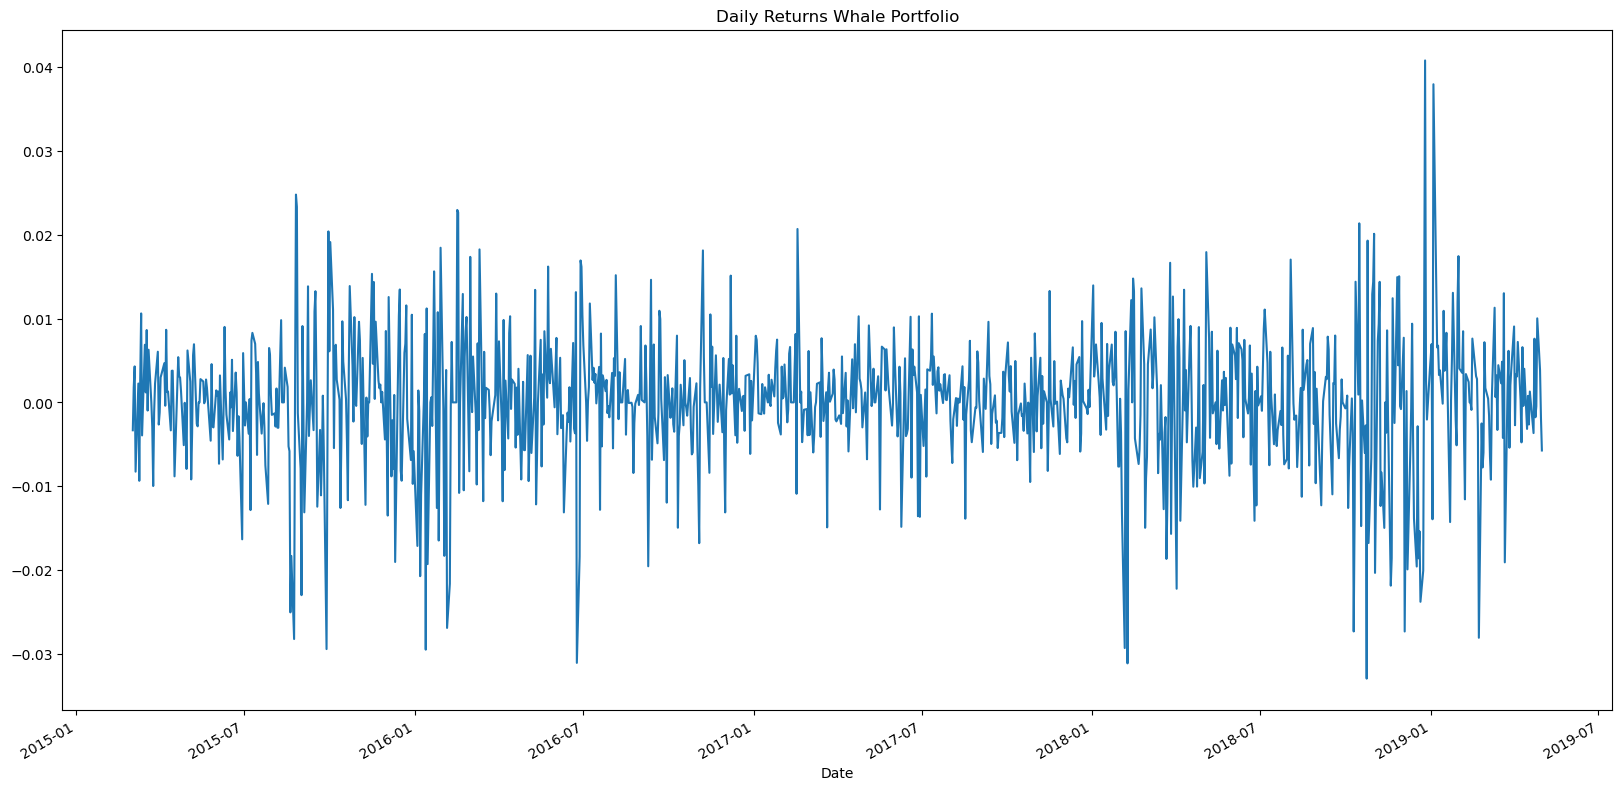

In [92]:
# plot daily returns over 5 years
whale_portfolio_returns.plot(figsize =(20,10), title="Daily Returns Whale Portfolio")

In [93]:
# daily returns trading algorithms portfolio for 2 equally weighted assets
weights2 = [0.5, 0.5]
algo_portfolio_returns = algo_returns2.dot(weights2)
algo_portfolio_returns

Date
2014-06-05    0.008674
2014-06-06    0.005070
2014-06-09    0.000328
2014-06-10    0.001835
2014-06-11    0.000499
                ...   
2019-04-25   -0.003282
2019-04-26    0.004118
2019-04-29    0.004019
2019-04-30   -0.002257
2019-05-01   -0.003632
Length: 1235, dtype: float64

<Axes: title={'center': 'Daily Returns Algo Portfolio'}, xlabel='Date'>

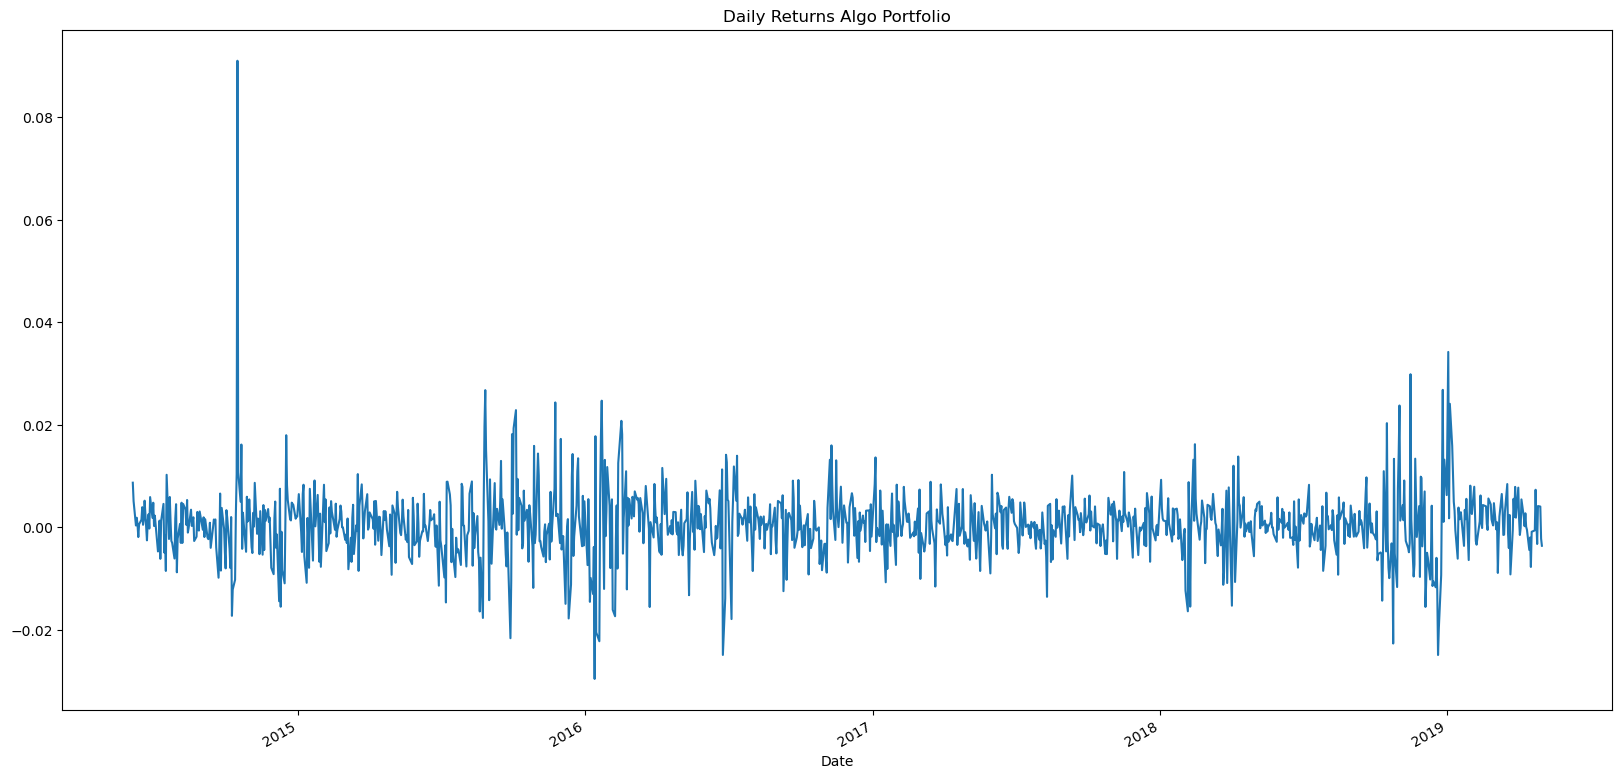

In [94]:
# plot daily returns over 5 years
algo_portfolio_returns.plot(figsize=(20,10), title= "Daily Returns Algo Portfolio")

In [95]:
# daily returns S&P TSX portfolio
sp_tsx_portfolio_returns = sp_tsx2.drop(columns=['S&P Close'])
sp_tsx_portfolio_returns

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


<Axes: title={'center': 'Daily Returns S&P TSX Portfolio'}, xlabel='Date'>

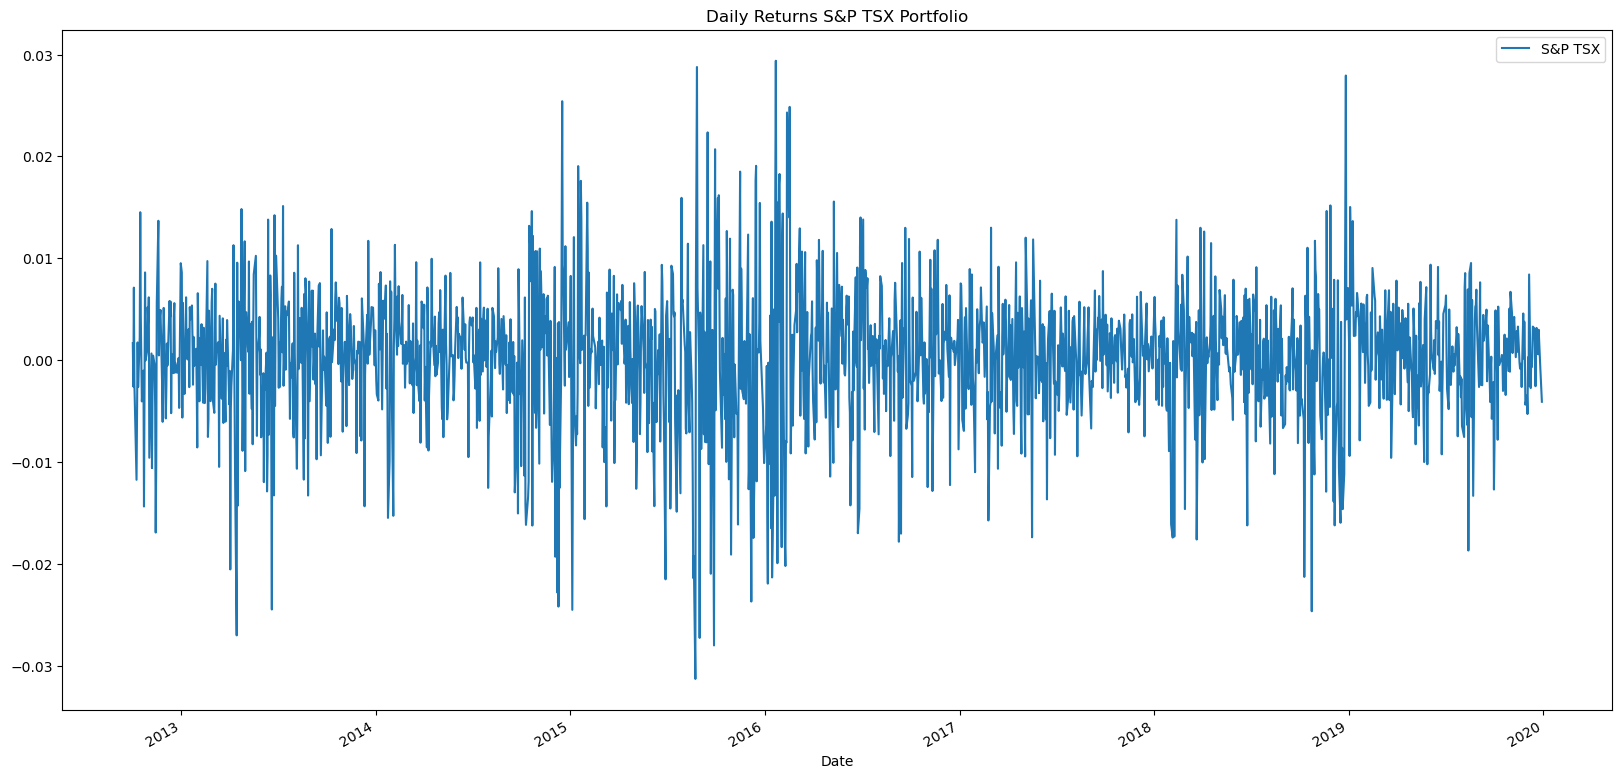

In [96]:
# plot daily returns over 5 years
sp_tsx_portfolio_returns.plot(figsize=(20,10), title="Daily Returns S&P TSX Portfolio")

#### Calculate and Plot cumulative returns.

In [97]:
# Calculate cumulative returns of all portfolios

cummulative_whale_portfolio_returns = (1 + whale_portfolio_returns).cumprod()-1
cummulative_whale_portfolio_returns

Date
2015-03-03   -0.003328
2015-03-04   -0.001546
2015-03-05    0.002741
2015-03-06   -0.005547
2015-03-09   -0.003310
                ...   
2019-04-25    0.067706
2019-04-26    0.078410
2019-04-29    0.082574
2019-04-30    0.080553
2019-05-01    0.074352
Length: 1059, dtype: float64

<Axes: title={'center': 'Cummulative Returns Whale Portfolio'}, xlabel='Date'>

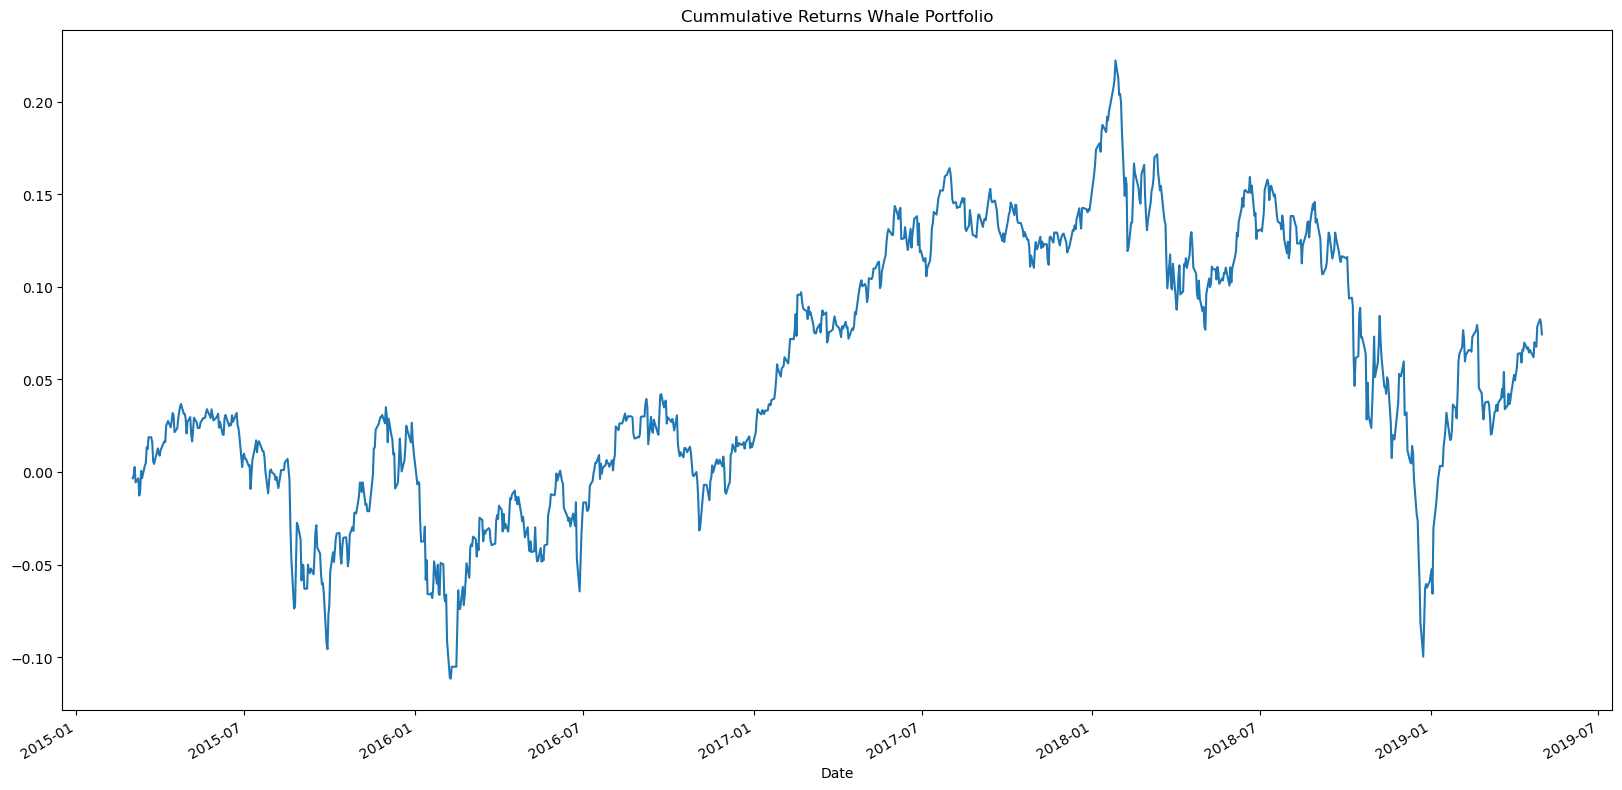

In [98]:
# Plot cumulative returns

cummulative_whale_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns Whale Portfolio")

In [99]:
# Calculate cumulative returns of all portfolios

cummulative_algo_portfolio_returns = (1 + algo_portfolio_returns).cumprod()-1
cummulative_algo_portfolio_returns

Date
2014-06-05    0.008674
2014-06-06    0.013788
2014-06-09    0.014121
2014-06-10    0.015982
2014-06-11    0.016489
                ...   
2019-04-25    0.793692
2019-04-26    0.801079
2019-04-29    0.808317
2019-04-30    0.804236
2019-05-01    0.797683
Length: 1235, dtype: float64

<Axes: title={'center': 'Cummulative Returns Algo Portfolio'}, xlabel='Date'>

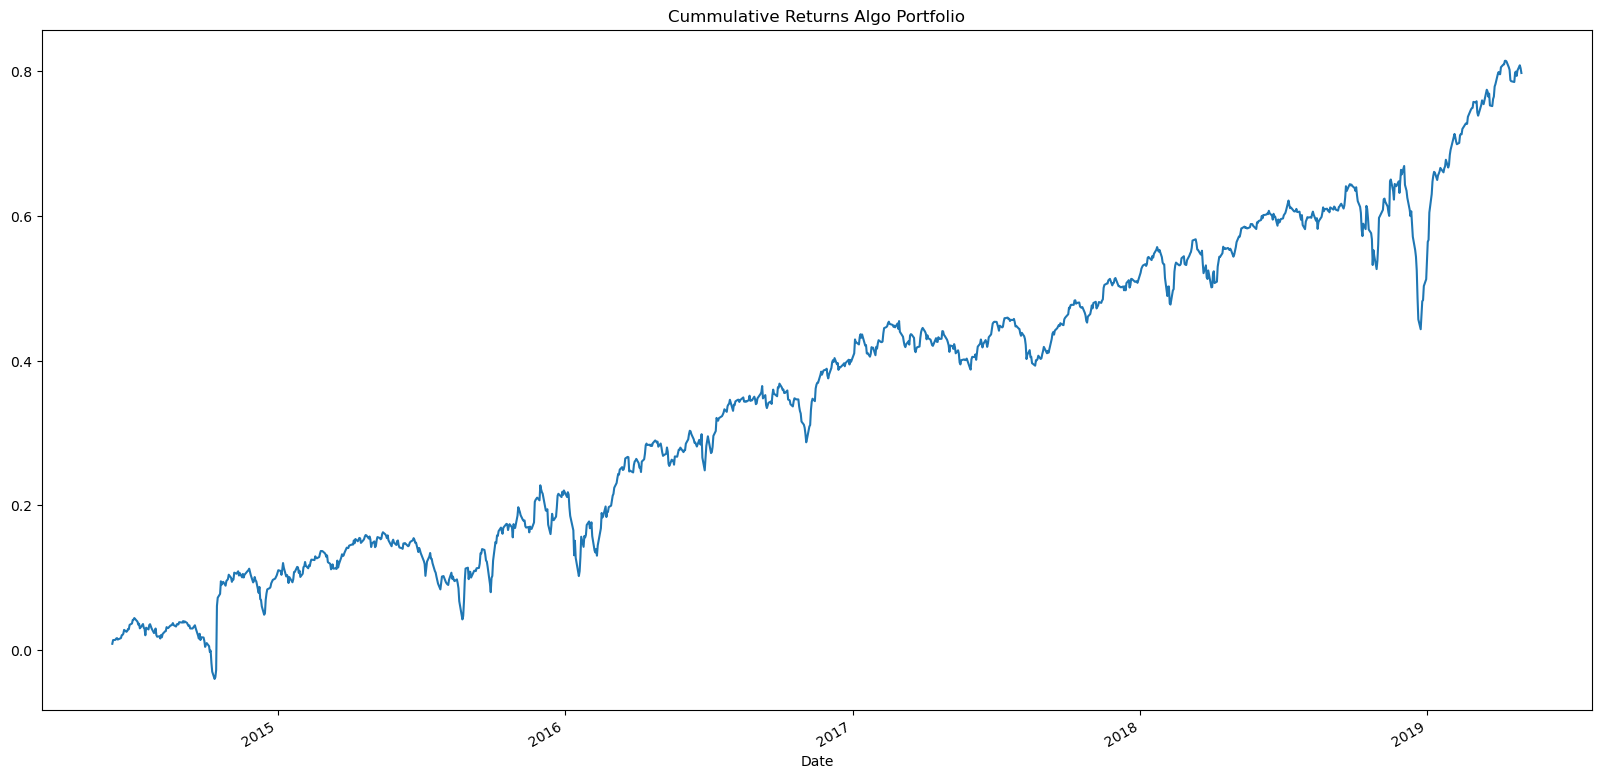

In [100]:
# Plot cumulative returns

cummulative_algo_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns Algo Portfolio")

In [101]:
# Calculate cumulative returns of all portfolios

cummulative_sp_tsx_portfolio_returns = (1 + sp_tsx_portfolio_returns).cumprod()-1
cummulative_sp_tsx_portfolio_returns

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.000867
2012-10-04,0.006264
2012-10-05,0.003945
...,...
2019-12-20,0.383846
2019-12-23,0.384676
2019-12-24,0.388835


<Axes: title={'center': 'Cummulative Returns S&P TSX Portfolio'}, xlabel='Date'>

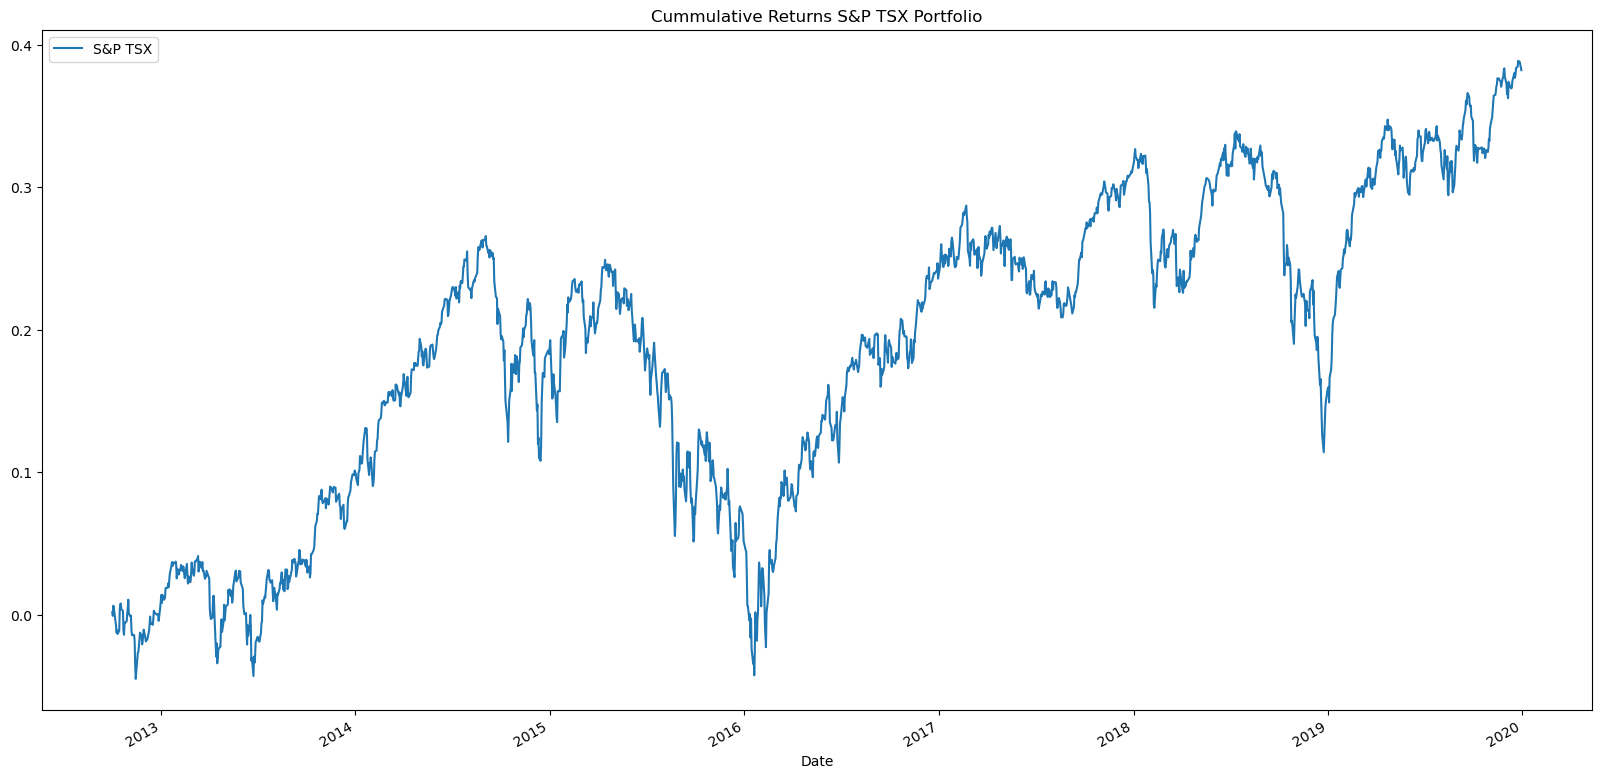

In [102]:
# Plot cumulative returns

cummulative_sp_tsx_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns S&P TSX Portfolio")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Whale Box Plot'}>

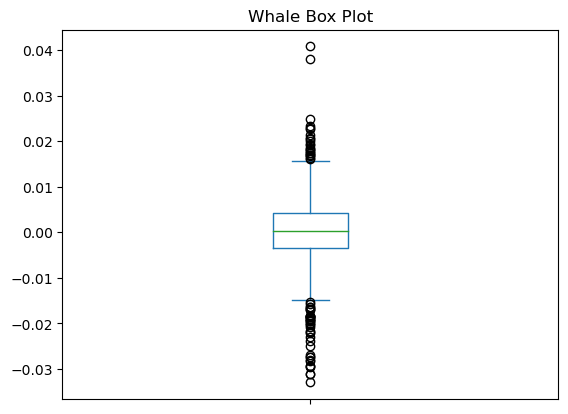

In [103]:
# Box plot to visually show risk
whale_portfolio_returns.plot.box(title = "Whale Box Plot")

In [104]:
### 50% of the daily returns are concentrated between -0.5% and 0.5%, with a minimum of -1.5% and a maximum of 1.5% indicated by both tails of the boxplot.
### There's a large number of outliers, which indicates a large deviation from average daily returns. Especially for higher returns with the two highest outliers at around 4%.
### Given the large amount of outliers, which entails great variations in daily returns, I assume the whale portfolio is RISKY.

<Axes: title={'center': 'Algo Box Plot'}>

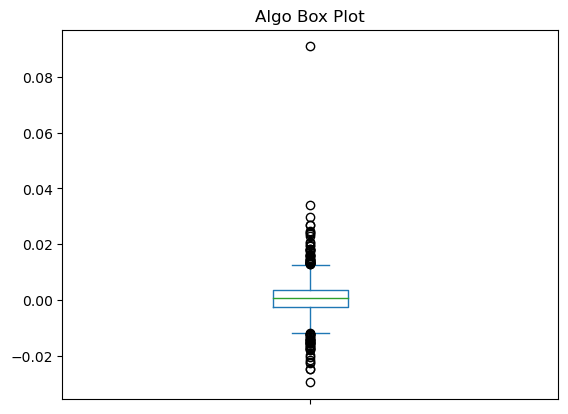

In [105]:
# Box plot to visually show risk
algo_portfolio_returns.plot.box(title = "Algo Box Plot")

In [106]:
### The algo portoflio returns are more concentrated, as we can see from the smaller box. 50% of daily returns range from -1% to 0% and 50% from 0 to 1%.
### There's also a large amount of outliers, but also concentrated, with the exception of 1 abnormally high outlier with a daily return of 9%.
### Looking at the distribution of daily returns, I assume that the algo portfolio would have the lowest risk since returns are highly concentrated, but the abmormally high outlier at 9% can cunterbalance the result.

<Axes: title={'center': 'S&P TSX Box Plot'}>

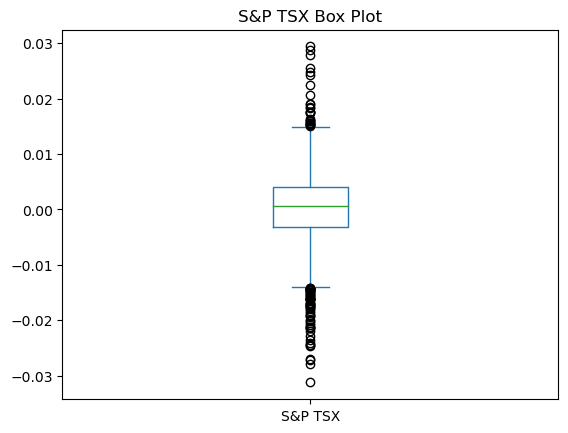

In [107]:
# Box plot to visually show risk
sp_tsx_portfolio_returns.plot.box(title = "S&P TSX Box Plot")

In [108]:
### The shape of the distribution of the S&P TSX  returns looks symmetric. Outliers on lower and upper sides are relatively even, the lowest outlier reaches -3% and the highest 3%. 50% of daily returns range from -1.5% to 0%, and 50% from 0 to 1.5%.
### Given this distribution that appears to be a Normal distribution, the S&P TSX portfolio should have a low volatility.

### Calculate Standard Deviations

In [109]:
# Calculate the daily standard deviations of all portfolios
whale_daily_std = whale_portfolio_returns.std()
whale_daily_std

0.007894995212497506

In [110]:
# Calculate the daily standard deviations of all portfolios
algo_daily_std = algo_portfolio_returns.std()
algo_daily_std

0.006752030964420841

### Determine which portfolios are riskier than the S&P TSX 60

In [111]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_std = sp_tsx_portfolio_returns.std()
sp_tsx_daily_std


S&P TSX    0.006637
dtype: float64

In [112]:
# Determine which portfolios are riskier than the S&P TSX 60
### Both portfolios are riskier than the S&P TSX 60, since their respective standard deviations, or volatility, are greater than the S&P. 
### This is against my first assumption that the algo portfolio would be the safest one since the spread in its daily returns was highly concentrated. In the algo potfolio, the abnormally high outlier at 9% represents a huge spread from mean returns, large enough to significantly increase the portfolio's volatility. 
### I assume that without this outlier the standard deviation of algo would be lower than the S&P. 

### Calculate the Annualized Standard Deviation

In [113]:
# Calculate the annualized standard deviation (252 trading days)
whale_annualized_std = whale_daily_std * np.sqrt(252)
whale_annualized_std

0.12532916360588367

In [114]:
# Calculate the annualized standard deviation (252 trading days)
algo_annualized_std = algo_daily_std * np.sqrt(252)
algo_annualized_std

0.10718516865879092

In [115]:
# Calculate the annualized standard deviation (252 trading days)
sp_tsx_annualized_std = sp_tsx_daily_std * np.sqrt(252)
sp_tsx_annualized_std

S&P TSX    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Whale 21-Day Rolling Standard Deviation'}, xlabel='Date'>

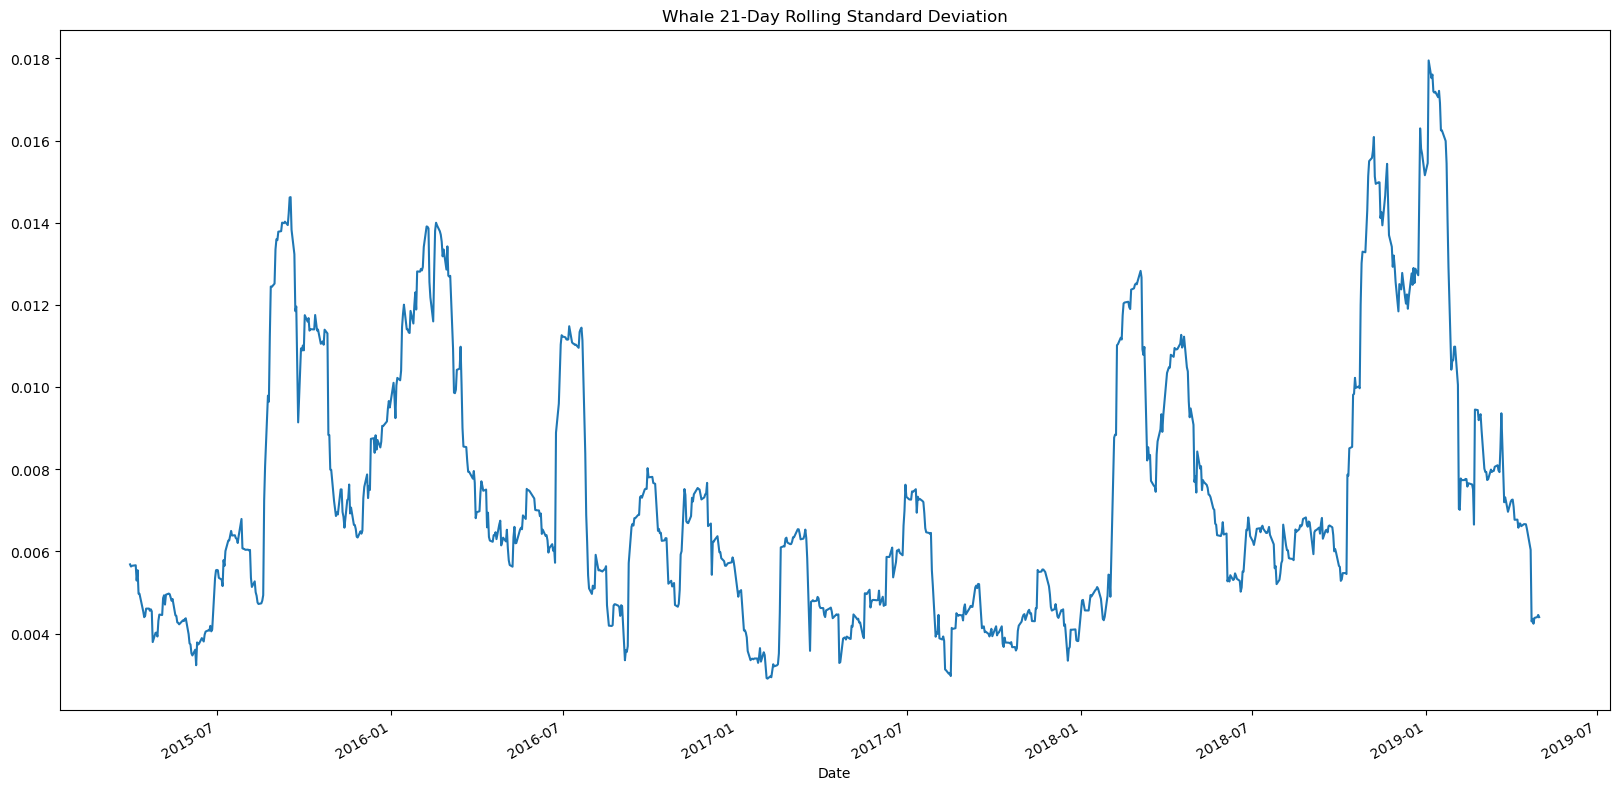

In [44]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="Whale 21-Day Rolling Standard Deviation")


<Axes: title={'center': 'Whale 21-Day Rolling Standard Deviation'}, xlabel='Date'>

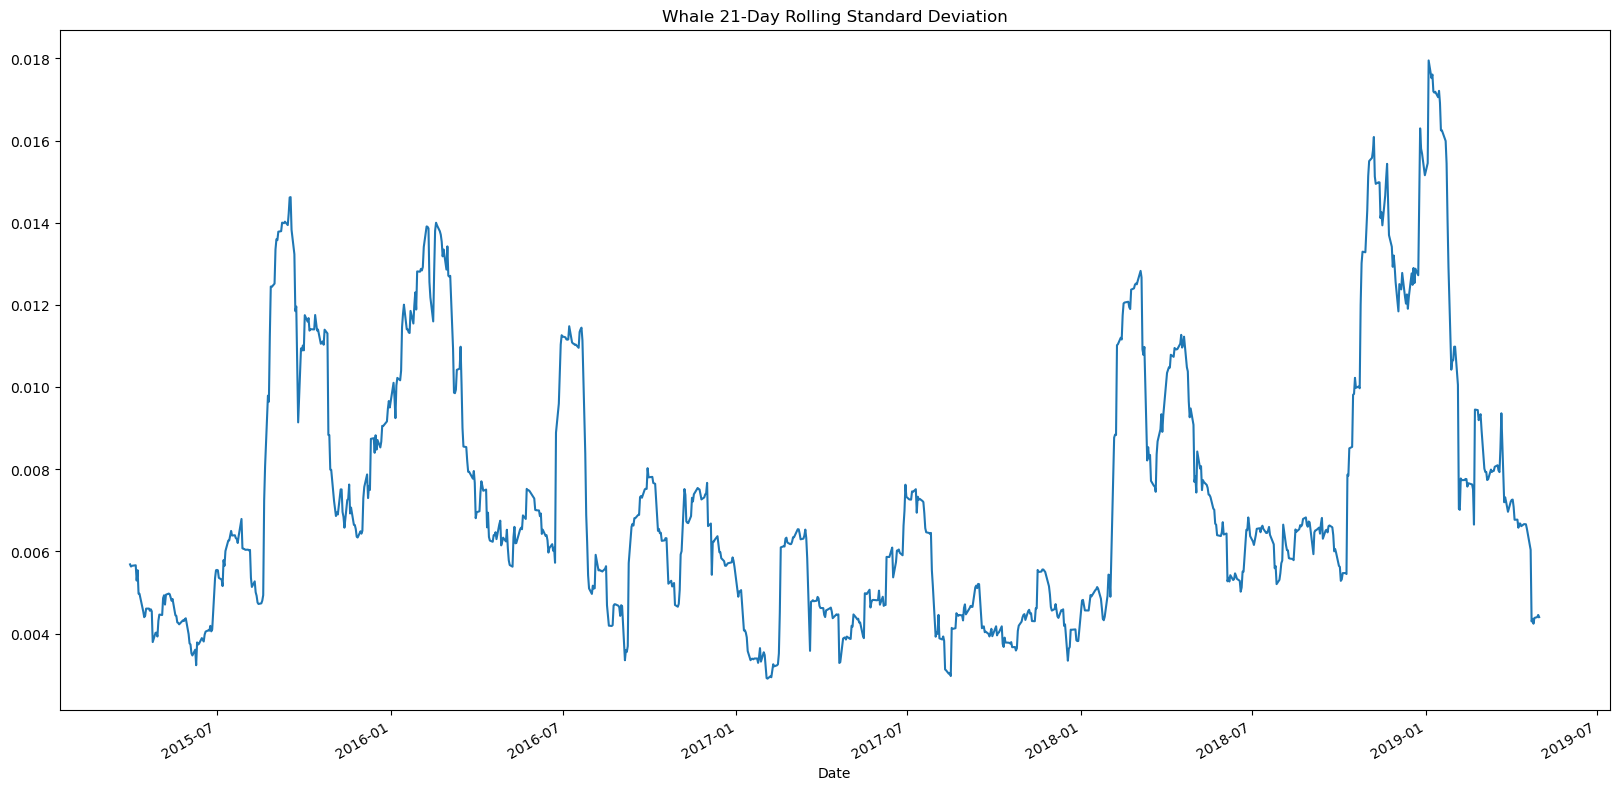

In [116]:
# Plot the rolling standard deviation
whale_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="Whale 21-Day Rolling Standard Deviation")


In [117]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
algo_portfolio_returns.rolling(window=21).std()

Date
2014-06-05         NaN
2014-06-06         NaN
2014-06-09         NaN
2014-06-10         NaN
2014-06-11         NaN
                ...   
2019-04-25    0.003928
2019-04-26    0.003986
2019-04-29    0.003735
2019-04-30    0.003783
2019-05-01    0.003517
Length: 1235, dtype: float64

<Axes: title={'center': 'Algo 21-Day Rolling Standard Deviation'}, xlabel='Date'>

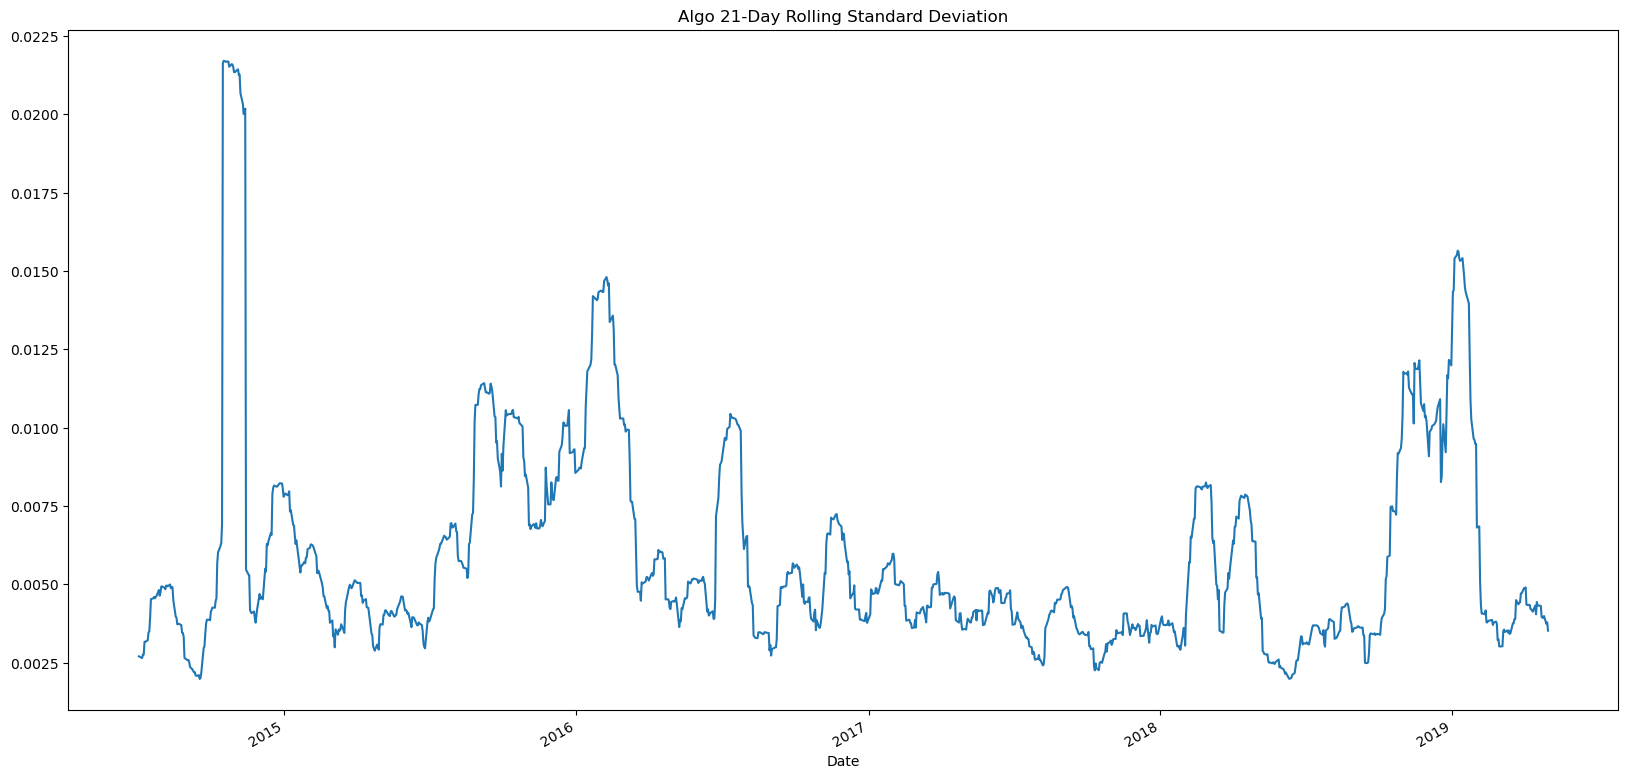

In [118]:
# Plot the rolling standard deviation
algo_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="Algo 21-Day Rolling Standard Deviation")

In [119]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_tsx_portfolio_returns.rolling(window=21).std()

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
...,...
2019-12-20,0.003366
2019-12-23,0.003298
2019-12-24,0.003216


<Axes: title={'center': 'S&P TSX 60 21-Day Rolling Standard Deviation'}, xlabel='Date'>

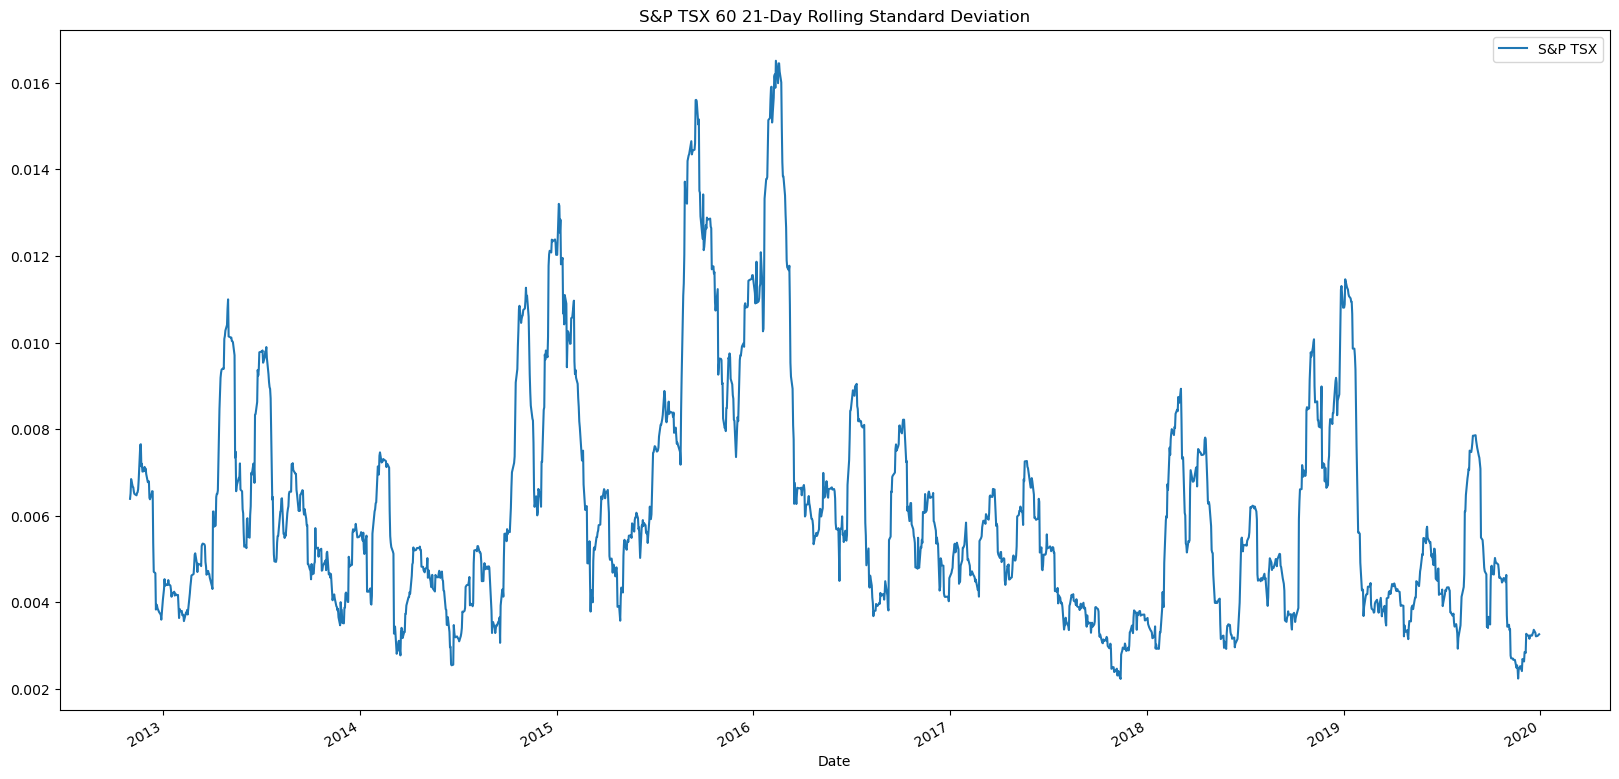

In [120]:
# Plot the rolling standard deviation
sp_tsx_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="S&P TSX 60 21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [121]:
# Calculate the correlation

df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<Axes: title={'center': 'Correlation between each stock and the market index'}>

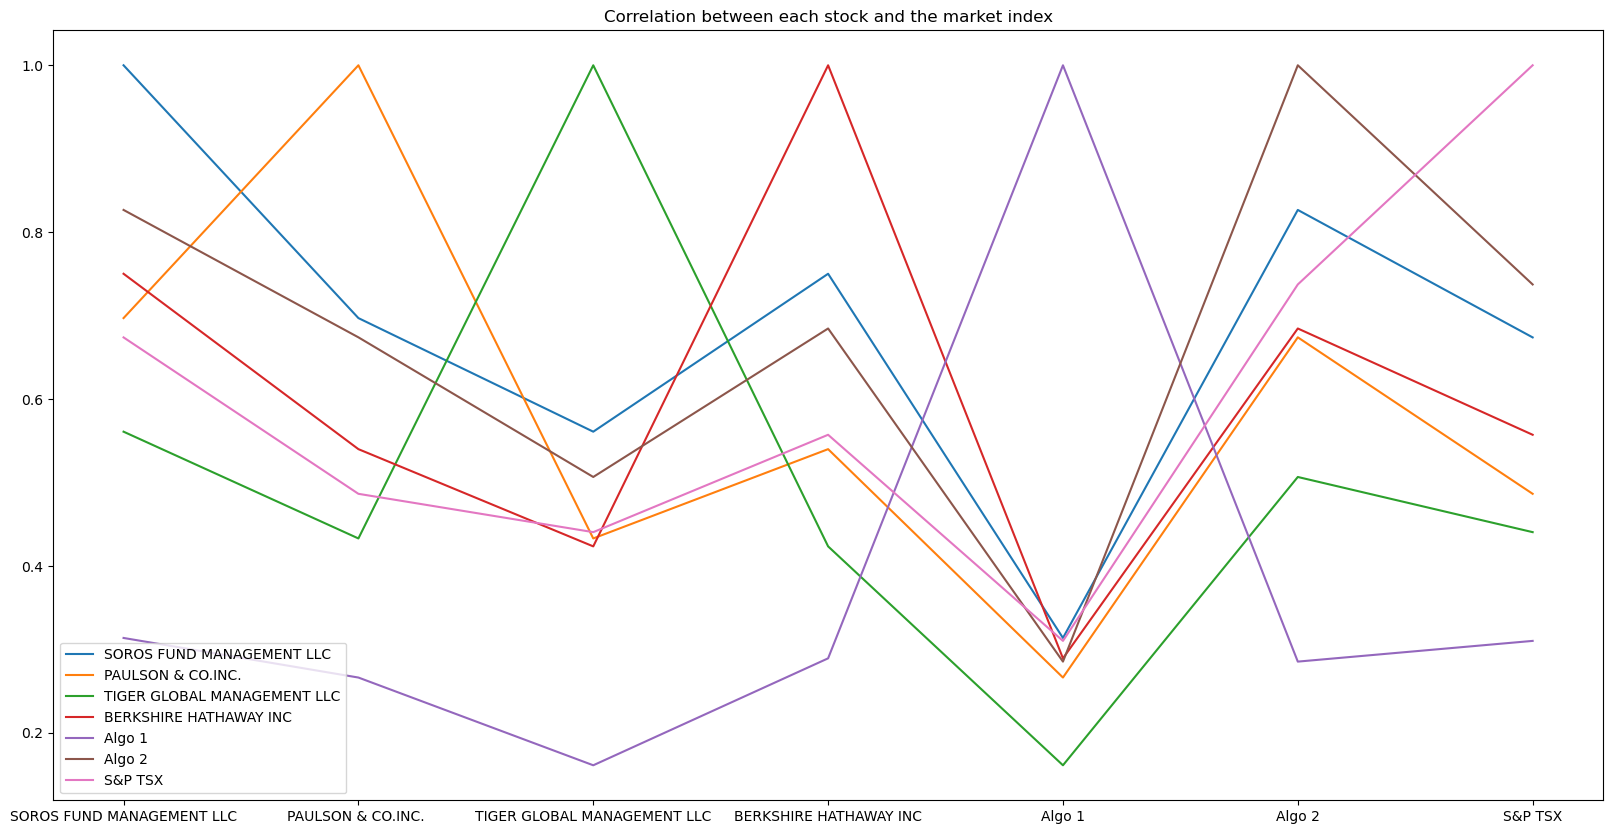

In [122]:
# Display de correlation matrix

df.corr().plot(figsize=(20,10), title = "Correlation between each stock and the market index")

In [123]:
### Algo 2 is highly correlated to the S&P: correlation coefficient =  0.7373. In other words, 73.73% of the variation in returns of Algo 2 can be explained by the movements in the S&P TSX 60.
### Soros Fund Management is highly correlated to the S&P (coeff = 0.673930). In other words, 67.39% of the variation in returns of Soros Fund can be explained by the movements in the S&P TSX 60.
### Berkshire Hathaway is moderately correlated to the S&P (coeff = 0.557250). In other words, 55.73% of the variation in returns of Berkshire Hathaway can be explained by the movements in the S&P TSX 60.

In [124]:
### Given that the second stock in the Algo portfolio (Algo 1) has a low correlation with the S&P TSX, I will not consider that it is closely related to the S&P.
### However, in the Whale portfolio, 2 out of the 4 stocks have a moderate to high correlation with the S&P TSX. The Paulson stock is 2% away from being moderately correlated to the S&P. So we can iner that the Whale porfolio mimicks the S&P TSX 60.

### Calculate and Plot Beta for a chosen portfolio - ALGO - and the S&P 60 TSX

In [125]:
## calculating the daily returns of Algo in the join data frame "df"
weights2 = [0.5, 0.5]
new_algo_portfolio_returns = df[['Algo 1','Algo 2']].dot(weights2)
new_algo_portfolio_returns

Date
2015-03-03   -0.001446
2015-03-04   -0.003086
2015-03-05    0.001684
2015-03-06   -0.008209
2015-03-09   -0.002072
                ...   
2019-04-25   -0.003282
2019-04-26    0.004118
2019-04-29    0.004019
2019-04-30   -0.002257
2019-05-01   -0.003632
Length: 1029, dtype: float64

In [126]:
# Calculate 60-day rolling covariance of Algo vs. S&P 500 
rolling_covariance = new_algo_portfolio_returns.rolling(window=60).cov(df['S&P TSX'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000009
2019-04-26    0.000009
2019-04-29    0.000009
2019-04-30    0.000009
2019-05-01    0.000009
Length: 1029, dtype: float64

In [127]:
# Calculate 60-day rolling variance of S&P 500 
rolling_variance = df['S&P TSX'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [128]:
# Computing beta

# Calculate 60-day rolling beta of Algo and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.578883
2019-04-26    0.580106
2019-04-29    0.566739
2019-04-30    0.584786
2019-05-01    0.569873
Length: 1029, dtype: float64

<Axes: title={'center': 'Rolling 60-Day Beta of Algo'}, xlabel='Date'>

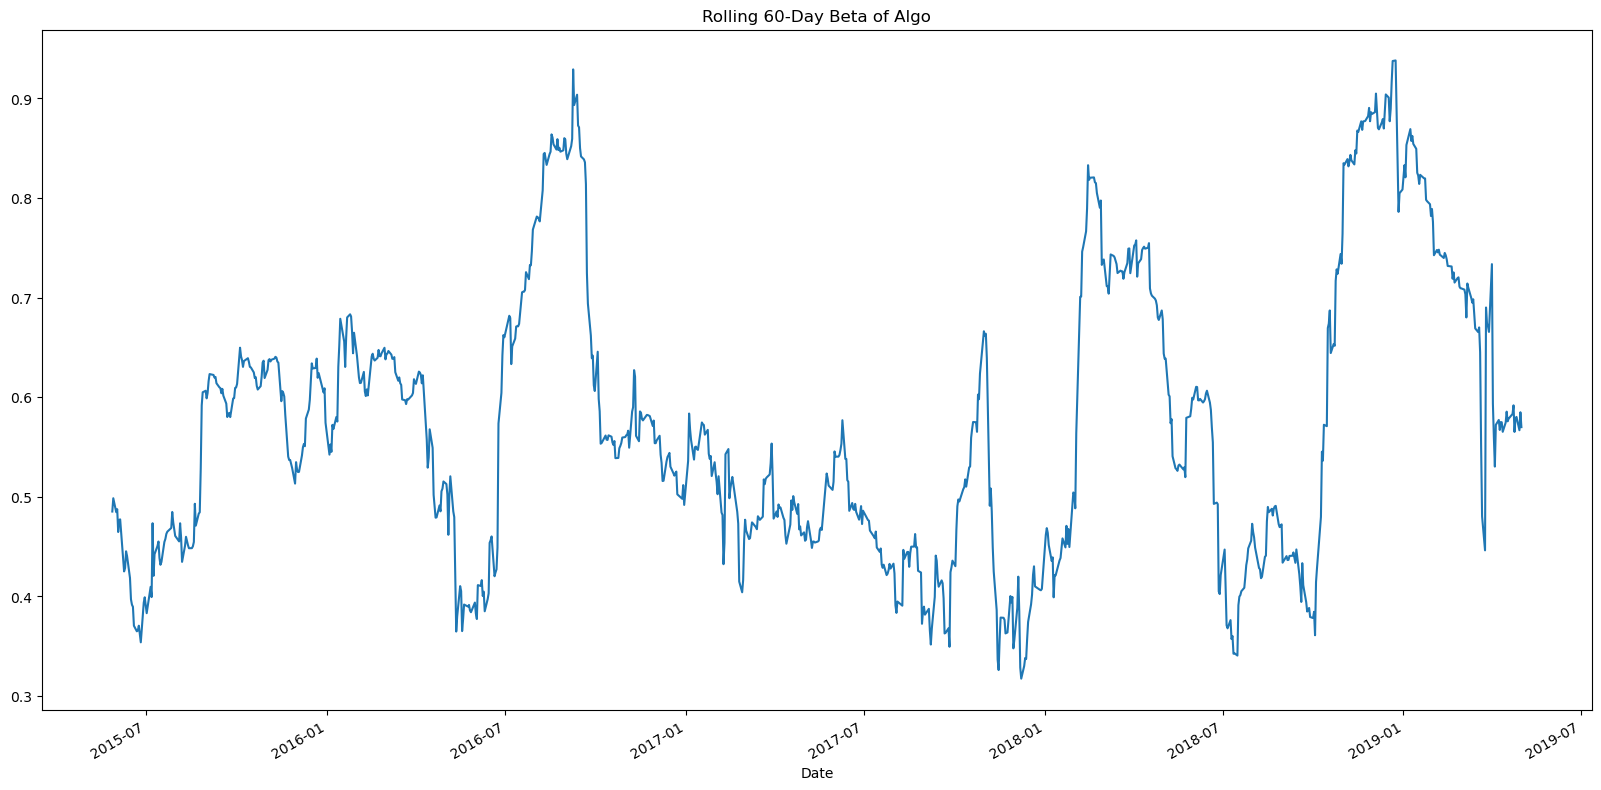

In [129]:
# Plot beta trend

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

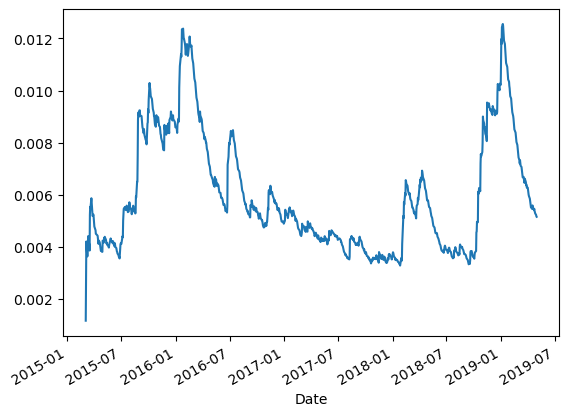

In [130]:
# Use `ewm` to calculate the rolling window
new_algo_portfolio_returns.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [131]:
# Annualized Sharpe Ratios
# sharpe ratios calculated without risk-free data 
sharpe_ratios = (df.mean() * 252) / (df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

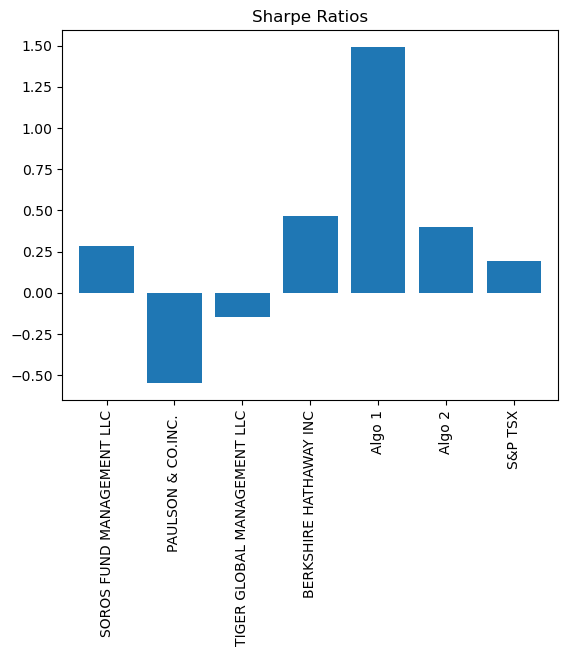

In [132]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot( width=0.8, kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [133]:
# Reading data from 1st stock
csv_path4 =  Path("Starter_code/Resources/otex_historical.csv")
otex_returns = pd.read_csv(csv_path4, parse_dates=True, index_col='Date',infer_datetime_format=True)

otex_returns.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [134]:
# Reading data from 2nd stock
csv_path5 =  Path("Starter_code/Resources/l_historical.csv")
l_returns = pd.read_csv(csv_path5, parse_dates=True, index_col='Date',infer_datetime_format=True)

l_returns.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [135]:
# Reading data from 3rd stock
csv_path6 =  Path("Starter_code/Resources/shop_historical.csv")
shop_returns = pd.read_csv(csv_path6, parse_dates=True, index_col='Date',infer_datetime_format=True)

shop_returns.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [136]:
# Combine all stocks in a single DataFrame
df_stocks = pd.concat([otex_returns,l_returns,shop_returns], axis=0, join="inner")
df_stocks

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [137]:
# Reset Date index
df_stocks.reset_index()

,Date,Symbol,Close
0,2018-01-02,OTEX,43.58
1,2018-01-03,OTEX,43.07
2,2018-01-04,OTEX,42.91
3,2018-01-05,OTEX,42.57
4,2018-01-08,OTEX,42.16
...,...,...,...
1498,2019-12-20,SHOP,513.22
1499,2019-12-23,SHOP,511.62
1500,2019-12-24,SHOP,525.39
1501,2019-12-27,SHOP,534.76


In [138]:
# Reorganize portfolio data by having a column per symbol

# Separate ticker data
OTEX = df_stocks[df_stocks['Symbol']=='OTEX'].drop('Symbol', axis=1)
L = df_stocks[df_stocks['Symbol']=='L'].drop('Symbol', axis=1)
SHOP = df_stocks[df_stocks['Symbol']=='SHOP'].drop('Symbol', axis=1)

#concanate dataframe
df_stock = pd.concat([OTEX, L, SHOP],axis=1, keys =['OTEX', 'L', 'SHOP'])

#display
df_stock

,OTEX,L,SHOP
,Close,Close,Close
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51
...,...,...,...
2019-12-20,58.68,67.90,513.22
2019-12-23,57.89,67.68,511.62


In [139]:
# Calculate daily returns
df_stock2 = df_stock.pct_change()
df_stock2

# Drop NAs
df_stock2 = df_stock2.dropna().copy()

# Display sample data
df_stock2


,OTEX,L,SHOP
,Close,Close,Close
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254
...,...,...,...
2019-12-20,0.024441,0.003547,-0.005503
2019-12-23,-0.013463,-0.003240,-0.003118


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [140]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

stock_portfolio_return = df_stock2.dot(weights)

# Display sample data
stock_portfolio_return

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [141]:
# Join your returns DataFrame to the original returns DataFrame
new_df =  pd.concat([df, df_stock2])
new_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,"(OTEX, Close)","(L, Close)","(SHOP, Close)"
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024441,0.003547,-0.005503
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013463,-0.003240,-0.003118
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007773,-0.000148,0.026915


In [142]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

new_df =  pd.concat([df, df_stock2],  axis="columns", join="inner")
new_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,"(OTEX, Close)","(L, Close)","(SHOP, Close)"
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.011703,-0.010002,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.003715,0.000174,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.007924,0.000000,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009631,-0.009753,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000712,0.008969,-0.011254
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.006224,0.007398,-0.003240
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.000773,-0.003672,0.012628
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.006181,0.002918,0.013173


## Re-run the risk analysis with your portfolio to see how it compares to the others

In [145]:
# Calculate the annualized `std`
portfolio_daily_std = stock_portfolio_return.std()
annualized_portfolio_std = portfolio_daily_std * np.sqrt(252)
annualized_portfolio_std

0.21679368071345856

In [146]:
whale_annualized_std

0.12532916360588367

In [147]:
algo_annualized_std

0.10718516865879092

In [148]:
sp_tsx_annualized_std

S&P TSX    0.105365
dtype: float64

In [149]:
### Given that the stock portfolio has a greater standard deviation that all portfolios previosuly examined, we can conclude that the stock portfolio is RISKIER, more volatile.

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
stock_portfolio_return.rolling(window=21).std().plot(figsize=(20,10), title="Whale 21-Day Rolling Standard Deviation")


<Axes: title={'center': 'Stock Portfolio 21-Day Rolling Standard Deviation'}, xlabel='Date'>

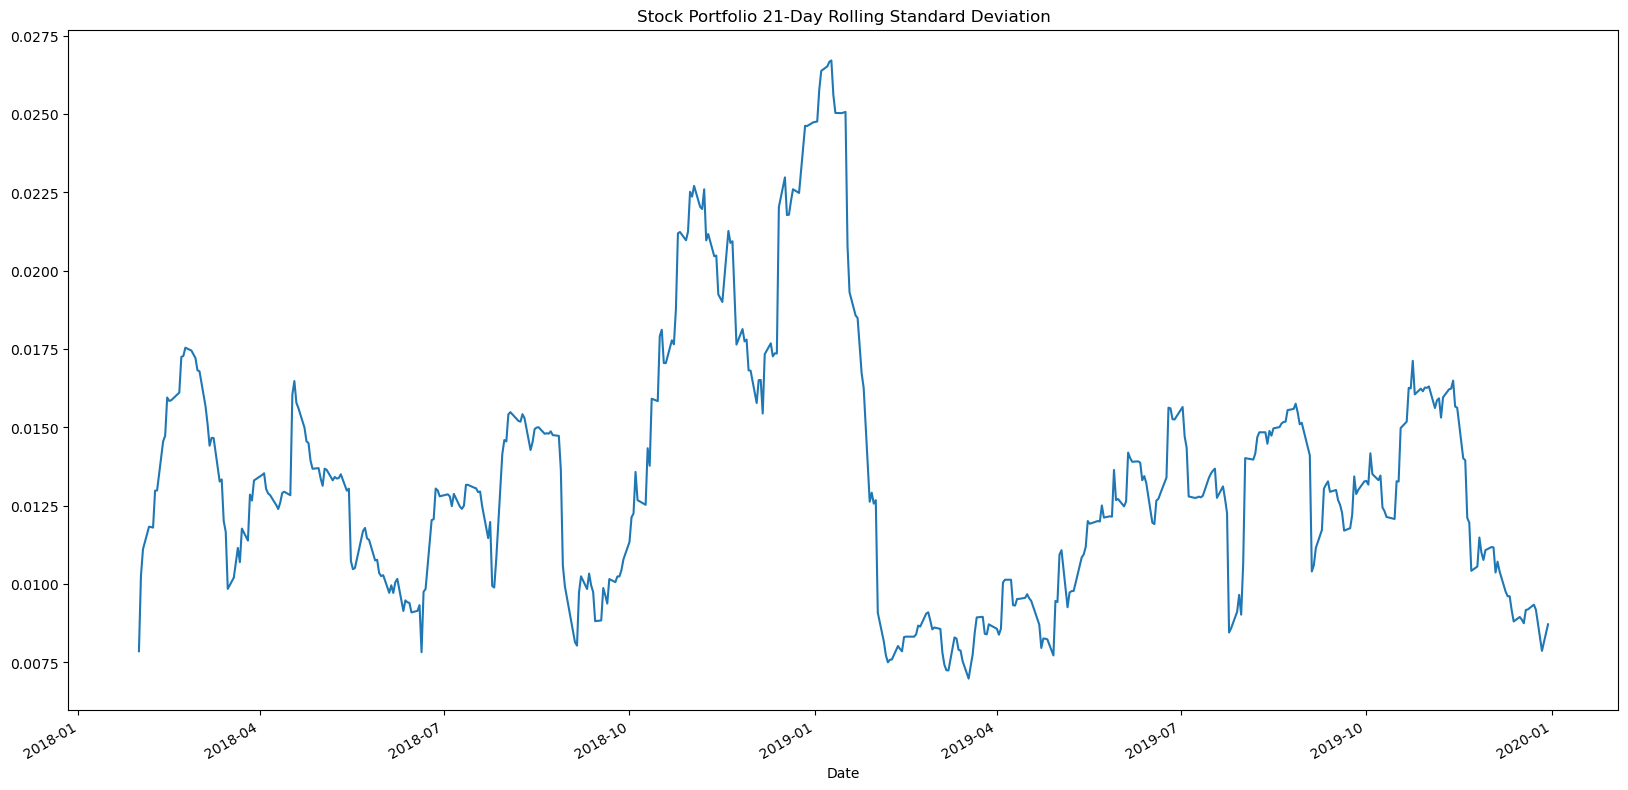

In [151]:
# Calculate rolling standard deviation
stock_portfolio_return.rolling(window=21).std()

# Plot rolling standard deviation
stock_portfolio_return.rolling(window=21).std().plot(figsize=(20,10), title="Stock Portfolio 21-Day Rolling Standard Deviation")

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="Whale 21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [152]:
# Calculate and plot the correlation
new_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,"(OTEX, Close)","(L, Close)","(SHOP, Close)"
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.383971,0.192009,0.508507
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.320638,0.164145,0.317837
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.250926,0.339680,0.183726
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.413242,0.130815,0.637107
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.108323,0.099106,0.206226
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.426084,0.168862,0.507364
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.450590,0.338382,0.462264
"(OTEX, Close)",0.383971,0.320638,0.250926,0.413242,0.108323,0.426084,0.450590,1.000000,0.174320,0.395357
"(L, Close)",0.192009,0.164145,0.339680,0.130815,0.099106,0.168862,0.338382,0.174320,1.000000,0.113386
"(SHOP, Close)",0.508507,0.317837,0.183726,0.637107,0.206226,0.507364,0.462264,0.395357,0.113386,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


In [157]:
# Calculate 60-day rolling covariance of Algo vs. S&P 500 
rolling_covariance = new_algo_portfolio_returns.rolling(window=60).cov(df['S&P TSX'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000009
2019-04-26    0.000009
2019-04-29    0.000009
2019-04-30    0.000009
2019-05-01    0.000009
Length: 1029, dtype: float64

In [158]:
# Calculate 60-day rolling covariance of Algo vs. S&P 500 
rolling_covariance_stock = stock_portfolio_return.rolling(window=60).cov(new_df['S&P TSX'])
rolling_covariance_stock

Date
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
2018-01-09   NaN
              ..
2019-12-20   NaN
2019-12-23   NaN
2019-12-24   NaN
2019-12-27   NaN
2019-12-30   NaN
Length: 500, dtype: float64

In [160]:
# Calculate 60-day rolling beta of Algo and plot the data
rolling_beta_stock = rolling_covariance_stock / rolling_variance_stock
rolling_beta_stock

Date
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
2018-01-09   NaN
              ..
2019-12-20   NaN
2019-12-23   NaN
2019-12-24   NaN
2019-12-27   NaN
2019-12-30   NaN
Length: 500, dtype: float64

<Axes: title={'center': 'Rolling 60-Day Beta of Algo'}, xlabel='Date'>

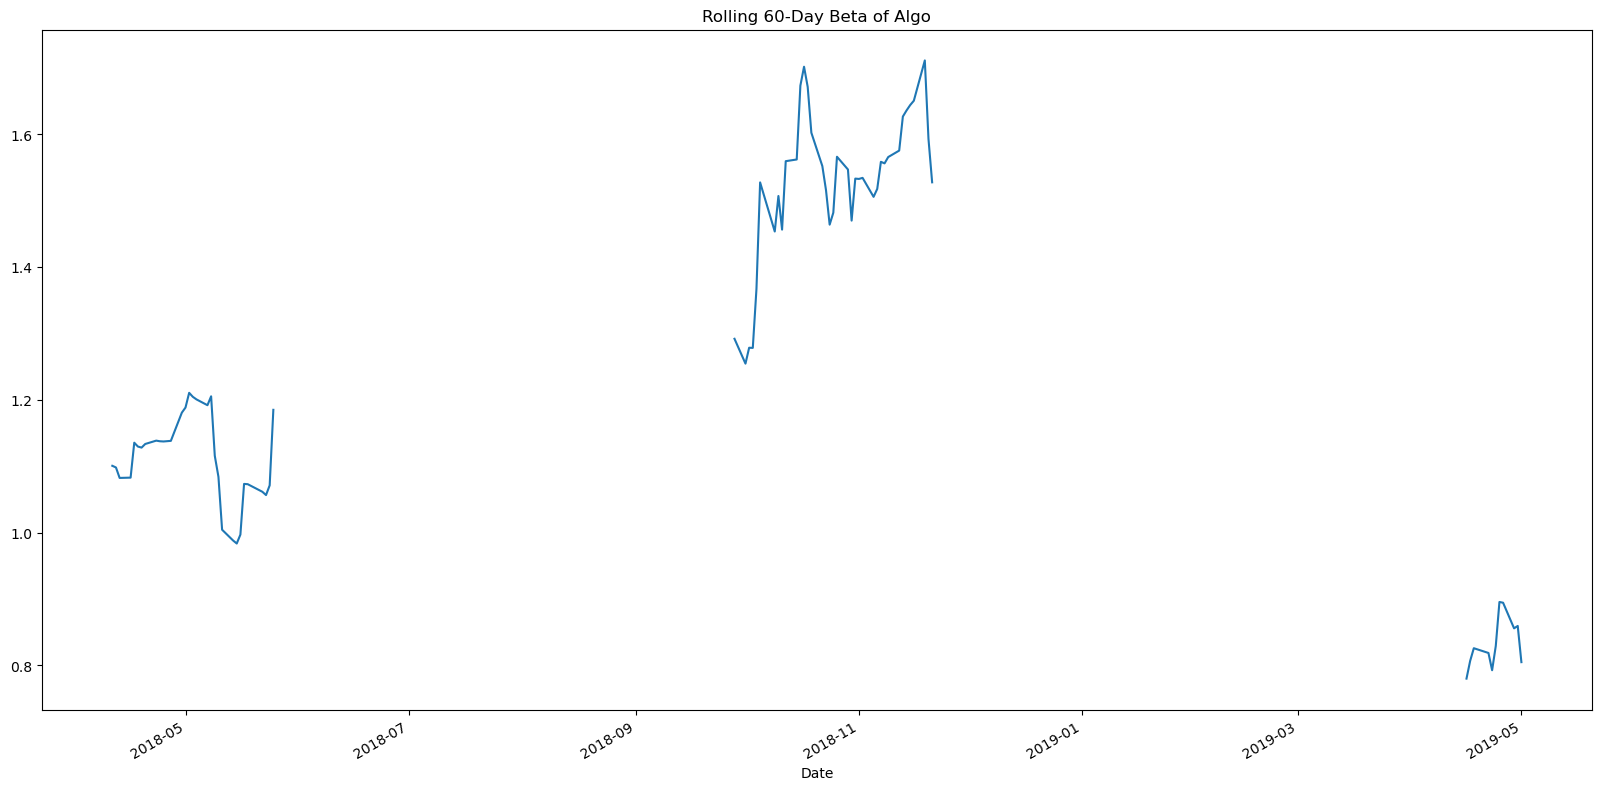

In [161]:
# Plot beta trend

rolling_beta_stock.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
# sharpe ratios calculated without risk-free data 

sharpe_ratios = (df.mean() * 252) / (df.std() * np.sqrt(252))
sharpe_ratios

In [163]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
# sharpe ratios calculated without risk-free data 
sharpe_ratios2 = (new_df.mean() * 252) / (new_df.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
(OTEX, Close)                  0.762776
(L, Close)                     0.532599
(SHOP, Close)                  1.575294
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

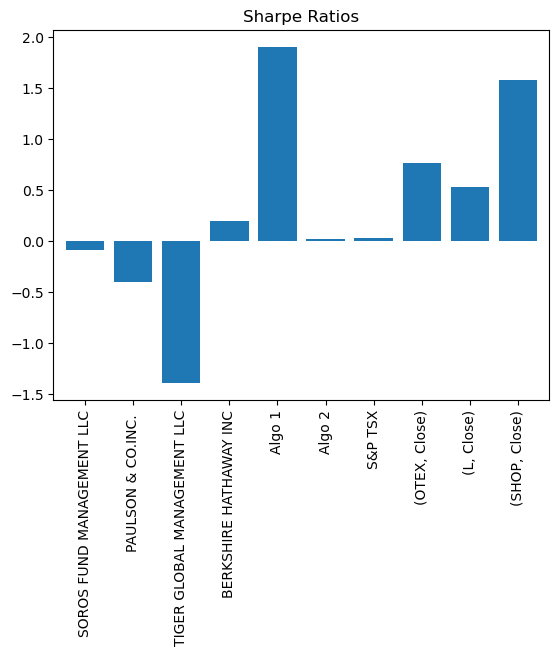

In [164]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot( width=0.8, kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
## The sharpe ratio is a measure of risk-adjusted return, or in other words the maximum expected return given the lowest level of stnadard deviation we can obtain. The higher the sharpe ratio, the greater the risk-adjusted return.
## The stock portfolio better than the S&P index as well as the Whale portfolio of mutual funds (the latter offers more risk than return, explained by the negative sharpe ratio). "Algo 1" in the Algortihmic trading portfolio is the only one surpassing the sharpe ratio of te stock portfolio.
## However, on avergae the stock portfolio perfotms very well with a sharpe r
A Sharpe ratio of 1.5 indicates that the investment is generating 1.5 units of excess return for each unit of risk taken, relative to the risk-free rate.